In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
#import the dataset
df = pd.read_csv("/project_data/data_asset/Iris.csv")
#Let's have a look at the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [116]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [117]:
df.drop("Id",axis=1,inplace=True)

In [118]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [119]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [121]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Input is the SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm
Output is Species

In [122]:
X= df.iloc[:,0:4]   # Must use iloc integer loc
y= df.iloc[:,4]

# convert category to number

In [123]:
# Giving Numerical values to our class labels as we will have to convert them to pytorch tensors.

for i in range(len(y)):
    if y[i] == 'Iris-setosa':
        y[i] = 0
    elif y[i] == 'Iris-versicolor':
        y[i] = 1
    else:
        y[i] = 2
y

/tmp/1000710000/ipykernel_129/1236494168.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 0
/tmp/1000710000/ipykernel_129/1236494168.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 1
/tmp/1000710000/ipykernel_129/1236494168.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 2


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: object

Normalize X

In [124]:
from sklearn.preprocessing import normalize
X = normalize(X)

In [125]:
y= np.array(y)
y=y.astype(int)

In [126]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.10,random_state=1)

In [127]:
from torch import optim
import torch.nn as nn
import torch

In [128]:
model = nn.Sequential(nn.Linear(4, 27),
        nn.ReLU(),
        nn.Linear(27,9),
        nn.ReLU(),
        nn.Linear(9,3) , # 3 output classes
        nn.LogSoftmax( dim=1)
                     
                     
                     )
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [129]:
model

Sequential(
  (0): Linear(in_features=4, out_features=27, bias=True)
  (1): ReLU()
  (2): Linear(in_features=27, out_features=9, bias=True)
  (3): ReLU()
  (4): Linear(in_features=9, out_features=3, bias=True)
  (5): LogSoftmax(dim=1)
)

In [130]:
print(model.parameters())

<generator object Module.parameters at 0x7f94360015b0>


In [131]:
def predict(model,inputs):
    output=model(inputs)
    return output.data.numpy().argmax(axis=1)

# Make torch tensor

In [132]:
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()

In [133]:
epochs = 1000
batch_size= 15
n_batches= 9

costs = []
test_acc=[]

for e in range(epochs):
    running_loss=0
    for j in range(n_batches):
        Xbatch = X_train[j*batch_size:(j+1)*batch_size]
        Ybatch = y_train[j*batch_size:(j+1)*batch_size]
        
        # we need to set the gradients to 0 b/c  Pytorch accumulates the gradients
        optimizer.zero_grad() 
        output = model(Xbatch)
        loss= criterion(output, Ybatch)
        loss.backward() # backward propagation
        optimizer.step() # update the weight
        running_loss += loss.item()
    
    Ypred= predict(model,X_test)
    acc=  np.mean(y_test == Ypred)
    print("Epoch: %d, cost: %f, accuracy: %.2f" % (e, running_loss/n_batches, acc))
    costs.append(running_loss/n_batches)
    test_acc.append(acc)

Epoch: 0, cost: 1.122777, accuracy: 0.33
Epoch: 1, cost: 1.121451, accuracy: 0.33
Epoch: 2, cost: 1.120171, accuracy: 0.33
Epoch: 3, cost: 1.118925, accuracy: 0.33
Epoch: 4, cost: 1.117704, accuracy: 0.33
Epoch: 5, cost: 1.116512, accuracy: 0.33
Epoch: 6, cost: 1.115354, accuracy: 0.33
Epoch: 7, cost: 1.114231, accuracy: 0.33
Epoch: 8, cost: 1.113149, accuracy: 0.33
Epoch: 9, cost: 1.112140, accuracy: 0.33
Epoch: 10, cost: 1.111155, accuracy: 0.33
Epoch: 11, cost: 1.110312, accuracy: 0.33
Epoch: 12, cost: 1.109626, accuracy: 0.33
Epoch: 13, cost: 1.109004, accuracy: 0.33
Epoch: 14, cost: 1.108423, accuracy: 0.33
Epoch: 15, cost: 1.107864, accuracy: 0.33
Epoch: 16, cost: 1.107318, accuracy: 0.33
Epoch: 17, cost: 1.106782, accuracy: 0.33
Epoch: 18, cost: 1.106254, accuracy: 0.33
Epoch: 19, cost: 1.105735, accuracy: 0.33
Epoch: 20, cost: 1.105224, accuracy: 0.33
Epoch: 21, cost: 1.104721, accuracy: 0.33
Epoch: 22, cost: 1.104226, accuracy: 0.33
Epoch: 23, cost: 1.103737, accuracy: 0.33
Ep

Epoch: 218, cost: 1.016216, accuracy: 0.60
Epoch: 219, cost: 1.015487, accuracy: 0.60
Epoch: 220, cost: 1.014753, accuracy: 0.60
Epoch: 221, cost: 1.014013, accuracy: 0.60
Epoch: 222, cost: 1.013266, accuracy: 0.60
Epoch: 223, cost: 1.012514, accuracy: 0.60
Epoch: 224, cost: 1.011754, accuracy: 0.60
Epoch: 225, cost: 1.010988, accuracy: 0.60
Epoch: 226, cost: 1.010215, accuracy: 0.60
Epoch: 227, cost: 1.009436, accuracy: 0.60
Epoch: 228, cost: 1.008650, accuracy: 0.60
Epoch: 229, cost: 1.007858, accuracy: 0.60
Epoch: 230, cost: 1.007059, accuracy: 0.60
Epoch: 231, cost: 1.006253, accuracy: 0.60
Epoch: 232, cost: 1.005442, accuracy: 0.60
Epoch: 233, cost: 1.004624, accuracy: 0.60
Epoch: 234, cost: 1.003799, accuracy: 0.60
Epoch: 235, cost: 1.002969, accuracy: 0.60
Epoch: 236, cost: 1.002130, accuracy: 0.60
Epoch: 237, cost: 1.001283, accuracy: 0.60
Epoch: 238, cost: 1.000431, accuracy: 0.60
Epoch: 239, cost: 0.999571, accuracy: 0.60
Epoch: 240, cost: 0.998703, accuracy: 0.60
Epoch: 241,

Epoch: 445, cost: 0.665482, accuracy: 0.60
Epoch: 446, cost: 0.663779, accuracy: 0.60
Epoch: 447, cost: 0.662084, accuracy: 0.60
Epoch: 448, cost: 0.660399, accuracy: 0.60
Epoch: 449, cost: 0.658722, accuracy: 0.60
Epoch: 450, cost: 0.657055, accuracy: 0.60
Epoch: 451, cost: 0.655397, accuracy: 0.60
Epoch: 452, cost: 0.653749, accuracy: 0.60
Epoch: 453, cost: 0.652110, accuracy: 0.60
Epoch: 454, cost: 0.650481, accuracy: 0.60
Epoch: 455, cost: 0.648861, accuracy: 0.60
Epoch: 456, cost: 0.647250, accuracy: 0.60
Epoch: 457, cost: 0.645649, accuracy: 0.60
Epoch: 458, cost: 0.644059, accuracy: 0.60
Epoch: 459, cost: 0.642477, accuracy: 0.60
Epoch: 460, cost: 0.640904, accuracy: 0.60
Epoch: 461, cost: 0.639342, accuracy: 0.60
Epoch: 462, cost: 0.637790, accuracy: 0.60
Epoch: 463, cost: 0.636247, accuracy: 0.60
Epoch: 464, cost: 0.634715, accuracy: 0.60
Epoch: 465, cost: 0.633192, accuracy: 0.60
Epoch: 466, cost: 0.631679, accuracy: 0.60
Epoch: 467, cost: 0.630176, accuracy: 0.60
Epoch: 468,

Epoch: 668, cost: 0.468093, accuracy: 0.80
Epoch: 669, cost: 0.467658, accuracy: 0.80
Epoch: 670, cost: 0.467226, accuracy: 0.80
Epoch: 671, cost: 0.466795, accuracy: 0.80
Epoch: 672, cost: 0.466366, accuracy: 0.80
Epoch: 673, cost: 0.465937, accuracy: 0.80
Epoch: 674, cost: 0.465510, accuracy: 0.80
Epoch: 675, cost: 0.465085, accuracy: 0.80
Epoch: 676, cost: 0.464661, accuracy: 0.80
Epoch: 677, cost: 0.464238, accuracy: 0.80
Epoch: 678, cost: 0.463816, accuracy: 0.80
Epoch: 679, cost: 0.463395, accuracy: 0.80
Epoch: 680, cost: 0.462976, accuracy: 0.80
Epoch: 681, cost: 0.462557, accuracy: 0.80
Epoch: 682, cost: 0.462140, accuracy: 0.80
Epoch: 683, cost: 0.461723, accuracy: 0.80
Epoch: 684, cost: 0.461308, accuracy: 0.80
Epoch: 685, cost: 0.460892, accuracy: 0.80
Epoch: 686, cost: 0.460479, accuracy: 0.80
Epoch: 687, cost: 0.460067, accuracy: 0.80
Epoch: 688, cost: 0.459655, accuracy: 0.80
Epoch: 689, cost: 0.459244, accuracy: 0.80
Epoch: 690, cost: 0.458834, accuracy: 0.80
Epoch: 691,

Epoch: 888, cost: 0.386175, accuracy: 1.00
Epoch: 889, cost: 0.385819, accuracy: 1.00
Epoch: 890, cost: 0.385463, accuracy: 1.00
Epoch: 891, cost: 0.385107, accuracy: 1.00
Epoch: 892, cost: 0.384750, accuracy: 1.00
Epoch: 893, cost: 0.384394, accuracy: 1.00
Epoch: 894, cost: 0.384038, accuracy: 1.00
Epoch: 895, cost: 0.383681, accuracy: 1.00
Epoch: 896, cost: 0.383325, accuracy: 1.00
Epoch: 897, cost: 0.382969, accuracy: 1.00
Epoch: 898, cost: 0.382612, accuracy: 1.00
Epoch: 899, cost: 0.382256, accuracy: 1.00
Epoch: 900, cost: 0.381899, accuracy: 1.00
Epoch: 901, cost: 0.381542, accuracy: 1.00
Epoch: 902, cost: 0.381185, accuracy: 1.00
Epoch: 903, cost: 0.380828, accuracy: 1.00
Epoch: 904, cost: 0.380473, accuracy: 1.00
Epoch: 905, cost: 0.380116, accuracy: 1.00
Epoch: 906, cost: 0.379759, accuracy: 1.00
Epoch: 907, cost: 0.379402, accuracy: 1.00
Epoch: 908, cost: 0.379045, accuracy: 1.00
Epoch: 909, cost: 0.378687, accuracy: 1.00
Epoch: 910, cost: 0.378330, accuracy: 1.00
Epoch: 911,

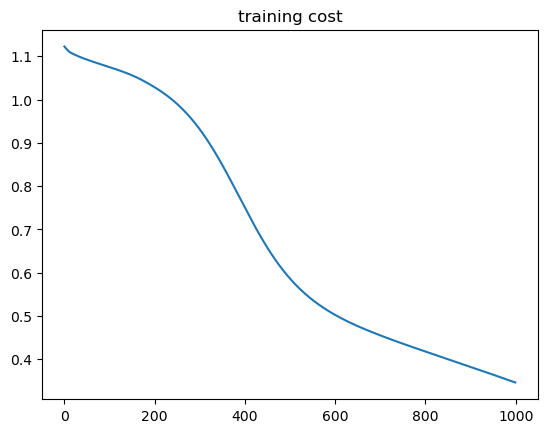

In [134]:
%matplotlib inline
plt.plot(costs)
plt.title("training cost")
plt.show()

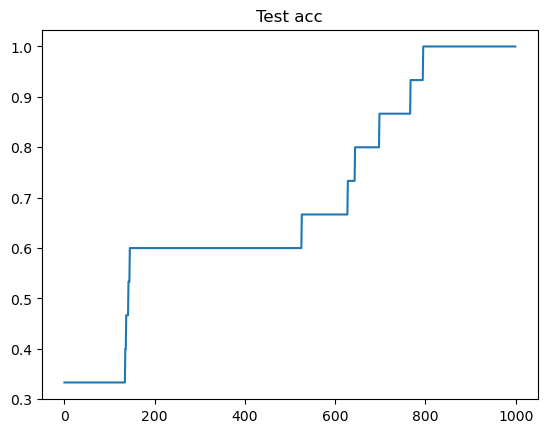

In [136]:
plt.plot(test_acc)
plt.title("Test acc")
plt.show()

In [138]:
from sklearn.metrics import accuracy_score
ypred= predict(model,X_test)
print("accuracy score is {}".format(accuracy_score(y_test,ypred)))

accuracy score is 1.0
